1. 장소 위치를 뽑을 때 

    '직거래' 라는 단어와 함께 쓰였을 것이다. 라는 가설로 시작해서 함께 쓰이는 단어를 kiwi로 뽑음.
    
    앞, 근처, 역, 출구, 동, 아파트, 집, 부근, 센터, 주민, 사거리, 인근..등
    
    키위 빈도와 포함빈도의 개수 차이가 너무 컸음.
    
    정확한 확인을 위해서 전체 문장을 띄어쓰기로 나누고 '역','아파트' 같은 단어가 들어간 단어를 추출함
    
    아파트의 경우 이름을 뽑아낼 수 있다는 장점을 가지고 있지만
    
    문제는 띄어쓰기로 이름을 쓰로 +아파트 한 경우는 뽑아내지 못함.
    
    그래도 역의 경우는 붙여쓰는 경우가 많았기 때문에 이름을 뽑아낼 수 있었음.
    
    역은 언급수를 카운트하고 표를 그릴 수 있었음. 
    
    어쩌면 정확해보일 수 있지만 인간이 직접 세야하는 부분이 많았고 정확도를 장담할 수 없었음. 
    


2. 역의 소재구 위치 매칭 테이블


3. 1인가구 수와 역의 관계를 보고자하였음. 

    여기서 1인가구는 연령을 제한하지 않고 전체로 설정함.
    
    실제로 1인가구수가 가장 많은 관악구의 신림역이 언급수 1위를 함
    
    관악구의 서울대입구역이 4위, 신대방역이 5위를 차지함.
    
    실제로 관악구를 제외한 다른 곳에서도 유의미한 결과가 나오지는 않았음. 
    
    
    
4. 전체 인구수와 역의 관계를 보고자하였음.

    203040대도 확인
    
    일인가구25-45세수 확인
    
    하지만 1인가구수,거주인구가 많다고 해서 실제 당근마켓 유저들을 대변할 수 없는 자료였기 때문에 포기
    
    

5. 역을 어떻게든 살려보기 위해 머리쓰던 과정에

    1인가구수를 계속 껴넣었었는데 이번에는 스팸과 엮어봄.
    
    가설:1인가구수가 많을수록 스팸을 매물로 많이 내놓는다
    
    ->실제로 1인가구수와 스팸 매물 수는 관계가 있었음.
    
    하지만 이 가설도 4번처럼 유저를 대변할 수 없어서 포기

df_token_2.xlsx

sample.txt

역_소재구_fin_fin.xlsx

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from statsmodels.formula.api import ols
from matplotlib import rc

In [10]:
import plotly.offline
import plotly.express as px

# 3

In [2]:
station = ['동대문역','약수역','혜화역','종각역','광화문역','압구정역','등촌역','서초역','강남구청역','오목교역','수서역','숭실대입구역','서울대입구역','오금역','마곡역','문래역','마포구청역','송파역','이수역','목동역','남영역','숙대입구역','석계역','마포구청역','서울대입구역','봉천역','사당역','망우역','광화문역','발산역','이수역','일동역','잠실새내역','삼전역','가락시장역','송파역','경찰병원역','양평역','낙성대역','아현역','문래역','북한산보국문역','서울대입구역','잠실역','송파나루역','망우역','상봉역','염창역','국회의사당역','신림역','등촌역','둔촌동역','양재역','강남역','내방역','월계역','녹천역','석계역','창동역','내방역','천호역','내방역','봉천역','내방역','강남구청역','여의도역','뚝섬유원지역','여의도역','여의도역','사당역','독산역','압구정로데오역','대방역','아현역','미아사거리역','오금역','양재역','잠원역','잠원역','신림역','중계역','신대방역','봉은사역','강남구청역','여의도역','마포역','성수역','한티역','왕십리역','신사역','논현역','신대방역','신림역','상왕십리역','이수역','사당역','신림역','서울대입구역','낙성대역','우장산역','일원역','일원역','일원역','영등포역','신도림역','구로디지털단지역','영등포역','응암역','사당역','상왕십리역','혜화역','송정역','공항시장역','신대방역','신길역','영등포역','신림역','답십리역','중곡역','선유도역','신림역','서울대입구역','금천구청역','돌곶이역','행당역','미아사거리역','용산역','종로3가역','답십리역','옥수역','뚝섬역','오류동역','보문역','성신여대입구역','상왕십리역','신설동역','방학역','가오리역','금천구청역','왕십리역','충정로역','상봉역','왕십리역','왕십리역','먹골역','면목역','상봉역','종각역','미아사거리역','먹골역','방학역','신용산역','종각역','광화문역','노원역','마들역','수락산역','창동역','도봉산역','방학역','도봉역','화계역','삼양역','중랑역','화랑대역','고덕역','마들역','노원역','신대방역','신대방역','등촌역','공릉역','매봉역','발산역','염창역','등촌역','길음역','영등포구청역','잠실역','봉천역','서울대입구역','이수역','강남역','신풍역','강남역','역삼역','가락시장역','대흥역','신촌역','마포역','공덕역','연신내역','상봉역','방배역','내방역','이대역','역삼역','강남역','사당역','신도림역','구로역','아차산역','이대역','사평역','미아사거리역','어린이대공원역','홍제역','녹번역','먹골역','길동역','길음역','신림역','대림역','합정역','잠실역','성수역','왕십리역','행당역','녹번역','면목역','망우역','창동역','내방역','내방역','상도역','숭실대입구역','상도역','숭실대입구역','망우역','문정역','문정역','상도역','숭실대입구역','강동역','방화역','아현역','아현역','창신역','보문역','학동역','답십리역','신사역','논현역','당산역','마곡나루역','수락산역','당산역','영등포시장역','답십리역','한티역','강동역','강동역','영등포역','개롱역','면목역','신림역','독립문역','염창역','길동역','이태원역','문래역','강동구청역','신림역','신대방역','돌곶이역','개롱역','서초역','교대역','선릉역','정릉역','개롱역','매봉역','영등포구청역','잠실새내역','사당역','북한산보국문역','이태원역','서울대입구역','길음역','안암역','외대앞역','사당역','이촌역','잠실새내역','영등포구청역','구반포역','수유역','4.19민주묘지역','북한산보국문역','서울대입구역','독립문역','내방역','신방화역','구로디지털단지역','공릉역','쌍문역','봉산역','도봉산역','양천구청역','이수역','명일역','군자역','아차산역','강동역','먹골역','구로역','신도림역','까치산역','목동역','구로역','염창역','천호역','독산역','당산역','영등포역','구로역','문정역','장지역','마포역','보라매역','상동역','송파나루역','응암역','보라매역','사가정역','서울대입구역','봉은사역','염창역','대림역','장승배기역','봉천역','수락산역','증미역','종합운동장역','오류동역','회기역','행당역','구의역','신전역','미아사거리역','신사역','아현역','이대역','신정역','가산디지털단지역','어린이대공원역','건대입구역','돌곶이역','개롱역','영등포구청역','신림역','김포공항역','숭실대입구역','사당역','상봉역','신설동역','목동역','신대방삼거리역','길음역','길음역','양천향교역','신림역','화곡역','우장산역','발산역','거여역','까치산역','화곡역','내방역','아차산역','애오개역','영등포역','낙성대역','제기역','암사역','상왕십리역','강남역','서울대입구역','영등포역','석계역','석계역','명일역','장한평역','길음역','건대입구역','디엠씨역','디엠씨역','교대역','상왕십리역','고속터미널역','신대방삼거리역','먹골역','남성역','마포역','오류동역','마장역','왕십리역','문래역','상계역','중곡역','개화산역','신용산역','용산역','독산역','천호역','노원역','신목동역','가양역','하계역','대방역','영등포역','신풍역','오목교역','영등포구청역','가산디지털단지역','상계역','창동역','강동역','서대문역','염창역','노량진역','신도림역','역촌역','신대방삼거리역','독립문역','서대문역','구로디지털단지역','남구로역','사가정역','남성역','장승배기역','월곡역','구로디지털단지역','신대방역','신림역','내방역','신논현역','고속터미널역','발산역','미아역','염창역','이수역','방이역','선정릉역','구로역','영등포구청역','수유역','새내역','교대역','굽은다리역','개봉역','신용산역','노량진역','천왕역','돌곶이역','용마산역','신사역','논현역','이대역','장한평역','선릉역','중계역','마포구청역','가양역','가산디지털단지역','애오개역','애오개역','강변역','신대방삼거리역','서초역','교대역','가산역','창동역','도곡역','잠원역','아차산역','석계역','돌곶이역','철산역','철산역','태릉입구역','하계역','중계역','노원역','상봉역','면목역','서울숲역','신대방역','신림역','강동구청역','이수역','독립문역','영등포역','잠실역','신논현역','학동역','화곡역','강남구청역','신대방역','송파역','미아사거리역','아차산역','창동역','중계역','마장역','마장역','화랑대역','미아사거리역','석계역','고려대역','독립문역','이태원역','중랑역','보문역','구로역','불광역','옥수역','목동역','왕십리역','장한평역','효창공원앞역','답십리역','석수역','금천구청역','미아역','수유역','쌍문역','행당역','먹골역','중화역','중랑역','건대입구역','방학역','창동역','왕십리역','한양대역','이촌역','행당역','종각역','종로2가역','행당역','답십리역','답십리역','답십리역','성수역','도봉역','도봉역','고려대역','대림역','상왕십리역','동묘앞역','한남역','남영역','구로디지털단지역','남구로역','쌍문역','안국역','서대문역','수유역','화계역','서대문역','쌍문역','중랑역','중화역','상봉역','망우역','아차산역','녹천역','신용산역','쌍문역','창동역','효창운동장역','숙대입구역','미아사거리역','신정네거리역','창동역','방학역','녹천역','녹천역','미아사거리역','증산역','창동역','중계역','수유역','독립문역','독립문역','독산역','독립문역','미아사거리역','미아사거리역','솔샘역','충무로역','미아사거리역','미아사거리역','창신역','동대문역','상왕십리역','영등포구청역','영등포시장역','아차산역','천호역','애오개역','공덕역','창동역','삼각지역','신대방삼거리역','새절역','강남역','녹번역','독립문역','서대문역','녹번역','신논현역','학동역','발산역','신논현역','이수역','마들역','상계역','합정역','화곡역','신림역','신도림','대림역','구로디지털단지역','신대방역','신림역','봉천역','학동역','천호역','창신역','동묘역','청구역','개롱역','개롱역','미아사거리역','미아사거리역','이촌역','총신대입구역','발산역','봉천역','방이역','까치산역','논현역','신사역','남부터미널역','굽은다리역','중랑역','신대방삼거리역','하계역','문정역','문정역','까치산역','동작역','흑석역','가양역','애오개역','공덕역','신정역','이대역','신촌역','길동역','사당역','금호역','당산역','홍대입구역','역곡역','낙성대역','신사역','논현역','개봉역','마천역','미아사거리역','구일역','녹번역','불광역','아현역','충정로역','서대문역','효창공원역','도봉역','용산역','공덕역','상수역','솔밭공원역','수유역','쌍문역','무악재역','독립문역','서대문역','가락시장역','경찰병원역','남부터미널역','잠실역','노원역','합정역','공덕역','행당역','신도림역','행당역','서울역','홍대입구역','노원역','개봉역','광명사거리역','철산역','홍대입구역','무악재역','노원역','영등포역','아현역','신림역','내방역','미아역','아현역','홍제역','무악재역','홍제역','무악재역','이대역','녹번역','상일동역','중계역','등촌역','등촌역','등촌역','노원역','아현역','아현역','신림역','대흥역','교대역','강남역','신대방역','낙성대역','서울대입구역','봉천역','서울대입구역','신림역','서울숲역','뚝섬역','용산역','공릉역','석계역','광운대역','월계역','구의역','영등포역','이수역','당산역','미아사거리역','경복궁역','이태원역','한강진역','숭실대입구역','숭실대입구역','숭실대입구역','당산역','이대역','홍제역','응암역','영등포역','마곡나루역','마곡나루역','암사역','염창역','숭실대입구역','홍대입구역','신정역','아현역','대방역','마장역','왕십리역','중랑역','상봉역','경복궁역','광화문역','서대문역','증산역','새절역','염창역','숭실대입구역','영등포역','녹번역','이대역','대흥역','정릉역','길음역','보국문로역','정릉역','보국문로역','길음역','구로역','구로역','길음역','개봉역','길동역','봉천역','서울대입구역','화곡역','상계역','선릉역','김포공항역','송정역','광화문역','혜화역','독산역','응봉역','문래역','솔샘역','상봉역','상봉역','영등포역','구로디지털단지역','서초역','여의도역','신사역']

In [3]:
count={}
for i in station:
    try: count[i] +=1
    except: count[i]=1
print(count)

{'동대문역': 2, '약수역': 1, '혜화역': 3, '종각역': 4, '광화문역': 5, '압구정역': 1, '등촌역': 7, '서초역': 4, '강남구청역': 4, '오목교역': 2, '수서역': 1, '숭실대입구역': 10, '서울대입구역': 13, '오금역': 2, '마곡역': 1, '문래역': 5, '마포구청역': 3, '송파역': 3, '이수역': 9, '목동역': 4, '남영역': 2, '숙대입구역': 2, '석계역': 7, '봉천역': 8, '사당역': 9, '망우역': 5, '발산역': 6, '일동역': 1, '잠실새내역': 3, '삼전역': 1, '가락시장역': 3, '경찰병원역': 2, '양평역': 1, '낙성대역': 5, '아현역': 11, '북한산보국문역': 3, '잠실역': 5, '송파나루역': 2, '상봉역': 10, '염창역': 9, '국회의사당역': 1, '신림역': 18, '둔촌동역': 1, '양재역': 2, '강남역': 7, '내방역': 11, '월계역': 2, '녹천역': 4, '창동역': 11, '천호역': 5, '여의도역': 5, '뚝섬유원지역': 1, '독산역': 5, '압구정로데오역': 1, '대방역': 3, '미아사거리역': 17, '잠원역': 3, '중계역': 6, '신대방역': 11, '봉은사역': 2, '마포역': 4, '성수역': 3, '한티역': 2, '왕십리역': 9, '신사역': 7, '논현역': 5, '상왕십리역': 7, '우장산역': 2, '일원역': 3, '영등포역': 14, '신도림역': 5, '구로디지털단지역': 7, '응암역': 3, '송정역': 2, '공항시장역': 1, '신길역': 1, '답십리역': 8, '중곡역': 2, '선유도역': 1, '금천구청역': 3, '돌곶이역': 5, '행당역': 8, '용산역': 4, '종로3가역': 1, '옥수역': 2, '뚝섬역': 2, '오류동역': 3, '보문역': 3, '성신여대입구역': 1, '신설동역': 2, '방학역': 5, '가오리역':

In [4]:
station_fin = pd.DataFrame(list(count.items()),columns=['역','언급수'])
station_fin = station_fin.sort_values(by=['언급수'], axis=0,ascending=False)
station_fin = station_fin.head(11)
station_fin

,역,언급수
41,신림역,18
55,미아사거리역,17
69,영등포역,14
12,서울대입구역,13
58,신대방역,11
48,창동역,11
45,내방역,11
34,아현역,11
38,상봉역,10
11,숭실대입구역,10


In [5]:
station_11 = station_fin
station_11['구'] = ['관악구','강북구','영등포구','관악구','관악구','도봉구','서초구','마포구','중랑구','동작구','종로구']
# station_11 = station_11.drop(['1인가구수'],axis=1)
station_11

,역,언급수,구
41,신림역,18,관악구
55,미아사거리역,17,강북구
69,영등포역,14,영등포구
12,서울대입구역,13,관악구
58,신대방역,11,관악구
48,창동역,11,도봉구
45,내방역,11,서초구
34,아현역,11,마포구
38,상봉역,10,중랑구
11,숭실대입구역,10,동작구


In [7]:
station_11 = station_11.sort_values('언급수',ascending=False)

In [9]:
gugu = pd.DataFrame(
                {'인구' : [155106,132259,240665,295767,355306,352259,394679,443206,306093,322419,520005,479409,317699,379984,454288,
          582995,424582,244685,402375,397231,502698,422174,536107,664341,469094]       
                },index = ['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구'])

In [11]:
gugu= gugu.reset_index()
gugu.columns = ['구','인구']
gugu.sort_values('인구',ascending=False).reset_index()

,index,구,인구
0,23,송파구,664341
1,15,강서구,582995
2,22,강남구,536107
3,10,노원구,520005
4,20,관악구,502698
5,11,은평구,479409
6,24,강동구,469094
7,14,양천구,454288
8,7,성북구,443206
9,16,구로구,424582


In [12]:
seoul1age = pd.read_excel('./서울시1인가구나이.xls')

In [13]:
seoul1age.sort_values('합계',ascending=False)

,구분,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
20,관악구,129233,1121,15893,36331,21802,11342,7063,6273,5345,5066,5321,4163,3553,2914,1946,1100
15,강서구,86172,336,4442,15643,13177,8898,5919,5333,4775,5080,6275,5142,4101,3138,2226,1687
23,송파구,73694,284,3099,11972,11929,8942,6143,5334,4388,4341,4938,3994,3273,2295,1553,1209
22,강남구,68999,498,3590,11221,12034,9433,6373,5181,3700,3152,3482,3061,2697,2061,1343,1173
19,동작구,64101,1261,8592,14153,9131,5246,3606,3322,2849,2774,3244,2813,2585,2055,1488,982
18,영등포구,64000,189,3622,13418,11074,6350,4144,4066,3583,3674,3844,2955,2513,2048,1497,1023
13,마포구,63172,663,6993,13204,10088,6872,4516,4053,2967,2576,2671,2199,2099,1922,1416,933
4,광진구,62301,562,7283,13249,8991,5692,3968,3600,3534,3576,3646,2650,2080,1688,1084,698
7,성북구,61510,1931,11271,9696,5663,3971,3167,3410,3379,3335,3916,3160,2882,2574,1898,1257
5,동대문구,60925,1527,10567,10639,6001,4058,3222,3316,3199,3417,3907,3209,2812,2425,1630,996


In [14]:
seoul_population = pd.concat([gugu,seoul1age], axis=1)

In [15]:
seoul_population = seoul_population.drop([seoul_population.columns[2]],axis=1)
seoul_population.head(2)

,구,인구,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,종로구,155106,25983,398,3331,4111,2923,1981,1516,1743,1612,1744,1727,1337,1156,1108,749,547
1,중구,132259,22818,435,2250,3232,2698,1975,1466,1527,1541,1539,1629,1372,1119,897,687,451


In [16]:
seoul_population.columns = ['구', '전체인구합', '1인가구합', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세',
       '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
       '75~79세', '80~84세', '85세이상']

In [17]:
station_11 = pd.merge(station_11, seoul_population[['구','1인가구합']], how='inner',on='구')
station_11

,역,언급수,구,1인가구합
0,신림역,18,관악구,129233
1,서울대입구역,13,관악구,129233
2,신대방역,11,관악구,129233
3,미아사거리역,17,강북구,45685
4,영등포역,14,영등포구,64000
5,창동역,11,도봉구,34884
6,내방역,11,서초구,43942
7,아현역,11,마포구,63172
8,상봉역,10,중랑구,56605
9,숭실대입구역,10,동작구,64101


In [18]:
station_11.columns=['역', '언급수', '구','일인가구수']

In [24]:
station_11 = station_11.sort_values('언급수',ascending=False)

In [20]:
rc('font', family='AppleGothic')

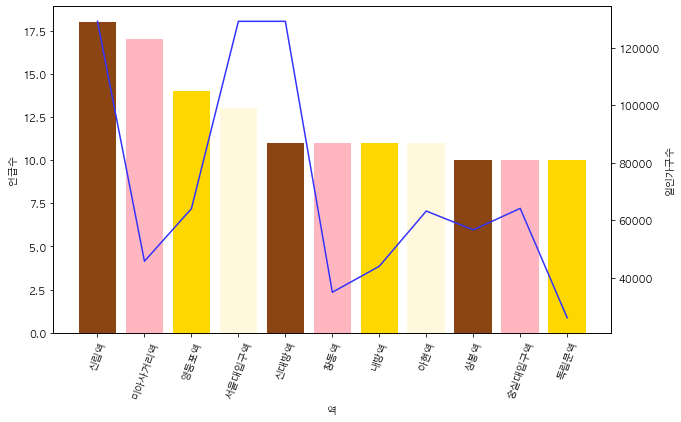

In [25]:
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.bar(station_11['역'],station_11['언급수'],color = ['saddlebrown','lightpink','gold','cornsilk'])
ax1.set_xlabel('역')
ax1.set_ylabel('언급수')
ax2 = ax1.twinx()
ax2.set_ylabel('일인가구수')
ax2.plot(station_11['역'],station_11['일인가구수'],color='#3232FF')
# plt.tick_params(axis='x', which='major', labelsize=15,rotation=70)
ax1.tick_params(axis='x',rotation=70)
# plt.xticks(station_11.역, fontsize=10, rotation=70)
plt.show()

In [26]:
ols('일인가구수 ~ 언급수',station_11).fit().summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  일인가구수   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.433
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.262
Time:                        01:50:49   Log-Likelihood:                -130.57
No. Observations:                  11   AIC:                             265.1
Df Residuals:                       9   BIC:                             265.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8433.9029   5.39e+04      0.156      0.879   -1.13e+05     1.3e+05
언급수         5097.7799   4258.600      1.197      0.262   -4535.843    1.47e+04
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.865
Skew:                           0.575   Prob(JB):                        0.649
Kurtosis:                       2.248   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5

In [27]:
b = pd.read_excel('./spam_0241.xlsx',index_col = 0)
b = b.reset_index(drop = True)

In [29]:
sgc = pd.DataFrame(b.groupby('region_gu')['num'].count())
sgc = sgc.sort_values('num',ascending=False)

In [32]:
seoul1age = pd.read_excel('./서울시1인가구나이.xls')
seoul1age = seoul1age.sort_values('합계',ascending=False)
seoul1age.columns = ['region_gu','일인가구합', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세',
       '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
       '75~79세', '80~84세', '85세이상']

In [33]:
sgc_alone = pd.merge(sgc, seoul1age[['region_gu','일인가구합']], how='inner',on='region_gu')
sgc_alone

,region_gu,num,일인가구합
0,관악구,126,129233
1,송파구,116,73694
2,마포구,111,63172
3,강서구,110,86172
4,은평구,99,57853
5,동작구,88,64101
6,영등포구,83,64000
7,강남구,83,68999
8,강동구,80,50316
9,서초구,78,43942


In [34]:
seoul1age['일인25~44세'] = seoul1age['25~29세']+seoul1age['30~34세']+seoul1age['35~39세']+seoul1age['40~44세']

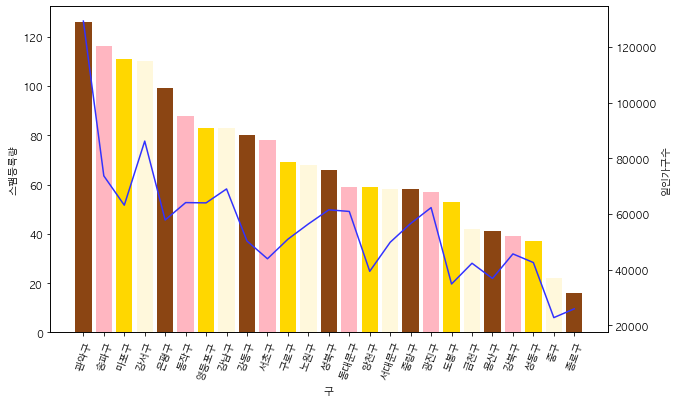

In [35]:
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.bar(sgc_alone['region_gu'],sgc_alone['num'],color = ['saddlebrown','lightpink','gold','cornsilk'])
ax1.set_xlabel('구')
ax1.set_ylabel('스팸등록량')
ax2 = ax1.twinx()
ax2.set_ylabel('일인가구수')
ax2.plot(sgc_alone['region_gu'],sgc_alone['일인가구합'],color='#3232FF')
# plt.tick_params(axis='x', which='major', labelsize=15,rotation=70)
ax1.tick_params(axis='x',rotation=70)
# plt.xticks(station_11.역, fontsize=10, rotation=70)
plt.show()

In [36]:
ols('num ~ 일인가구합',sgc_alone).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     47.23
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           5.24e-07
Time:                        02:00:43   Log-Likelihood:                -105.12
No. Observations:                  25   AIC:                             214.2
Df Residuals:                      23   BIC:                             216.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6371      9.645      0.688      0.498     -13.315      26.589
일인가구합          0.0011      0.000      6.873      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.844   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.516
Skew:                           0.452   Prob(JB):                        0.469
Kurtosis:                       2.202   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""